In [1121]:
#Necessary libraries
import praw
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer    
from nltk.corpus import stopwords
import collections
set(stopwords.words('english'))
ps = PorterStemmer() 

In [1122]:
#Downloading lib
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yatingupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yatingupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1123]:
#Id to scrape
my_client_id = "tlaYd7tsDOqvlQ"
my_client_secret = "xdRqwLkA07r8ScyJZTMsYUndrSA"
my_user_agent = "scrapping r/india"

In [1124]:
#Helper function to print full panda data frame to analyze data
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_colwidth', 950)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_colwidth')

In [1125]:
# API to access reddit data
reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)
india_subreddit = reddit.subreddit('India')

## Data Collection
<ul>
    <li>Getting TOP, HOT and NEW posts of reddit using the praw API </li>
    <li>Many JSON tags are retrived which may or may not be used in future </li>
    <li>https://github.com/reddit-archive/reddit/wiki/JSON used to study the tags </li>
    <li>This is done to get all the types of posts and not be trained on only one type. Also increases training data</li>
</ul>

In [1126]:
top_posts = []
for post in india_subreddit.top(limit=1000):
    top_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])

hot_posts = []
for post in india_subreddit.hot(limit=1000):
    hot_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])


new_posts = []
for post in india_subreddit.new(limit=1000):
    new_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])


## Exploratory Data Analysis

<ul>
    <li>Converting the data obtained into data frames for analyzing and combining the three types of data with duplicates removed</li>
    <li>Adding a text column that is title + body</li>
    <li>Removing NONE instances</li>
</ul>    

In [1127]:
top_posts = pd.DataFrame(top_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
hot_posts = pd.DataFrame(hot_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
new_posts = pd.DataFrame(new_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])

frames = [top_posts, hot_posts, new_posts]
data = pd.concat(frames)
data.drop_duplicates(keep='last',inplace=True)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.mask(data.eq('None')).dropna()
data.describe()

/Users/yatingupta/Github/Reddit-flare-detector/env/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,score,num_comments,created
count,2390.000000,2390.000000,2.390000e+03
mean,1137.420921,97.911297,1.573785e+09
std,1673.346234,230.136940,2.409911e+07
min,0.000000,0.000000,1.423102e+09
25%,19.000000,3.000000,1.570133e+09
50%,146.000000,29.000000,1.586957e+09
75%,1917.750000,134.000000,1.587106e+09
max,19707.000000,6913.000000,1.587245e+09


#### Here we analyze the division of count of posts in respective flares
This will tell how many and which flares are prominent

In [1128]:
data['flare'].value_counts()

Coronavirus                       679
Non-Political                     620
Politics                          462
AskIndia                          246
Policy/Economy                     75
Photography                        54
Business/Finance                   45
Science/Technology                 38
Sports                             37
[R]eddiquette                      35
Food                               21
Unverified                         15
Scheduled                          12
CAA-NRC                            10
CAA-NRC-NPR                         9
r/all                               3
Demonetization                      2
AMA                                 2
/r/all                              2
Policy & Economy                    2
| Not specific to India |           2
On Internet Shutdowns               1
Old                                 1
Misleading Headline                 1
Original Comics                     1
Misleading                          1
40 Martyrs  

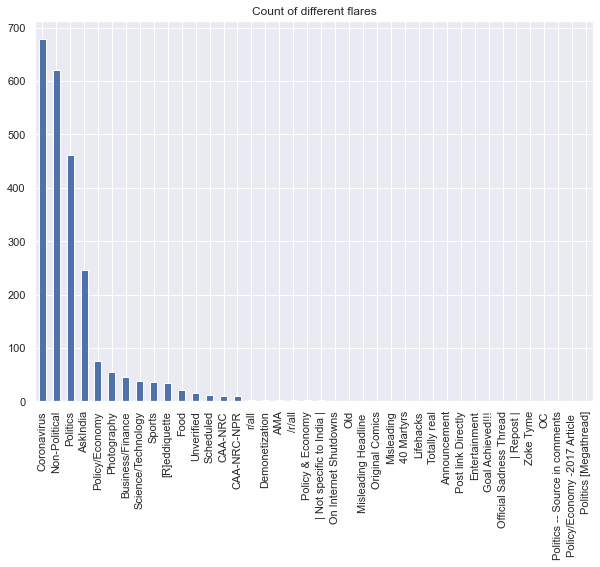

In [1129]:
ax, fig = plt.subplots(figsize=(10, 7))
flare_class = data["flare"].value_counts()
flare_class.plot(kind= 'bar')
plt.title('Count of different flares')
plt.show()

### Analyzing the word cloud of the four main Flares - Coronavirus, non-political, politics, askindia
This is done to visualize which words are more used wrt flares

In [1130]:
from wordcloud import WordCloud
stop_words = stopwords.words("english")

Coronavirus = data[data["flare"] == "Coronavirus"]
Non_Political = data[data["flare"] == "Non-Political"]
Politics = data[data["flare"] == "Politics"]
AskIndia = data[data["flare"] == "AskIndia"]

Coronavirus_words = ''
Non_Political_words = ''
Politics_words = ''
AskIndia_words = ''

#Extracting words wrt flares

for t in Coronavirus.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Coronavirus_words = Coronavirus_words + w + ' '
        
for t in Non_Political.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Non_Political_words = Non_Political_words + w + ' '
        
for t in Politics.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Politics_words = Politics_words + w + ' '
        
for t in AskIndia.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        AskIndia_words = AskIndia_words + w + ' '        


#### Coronavirus Wordcloud

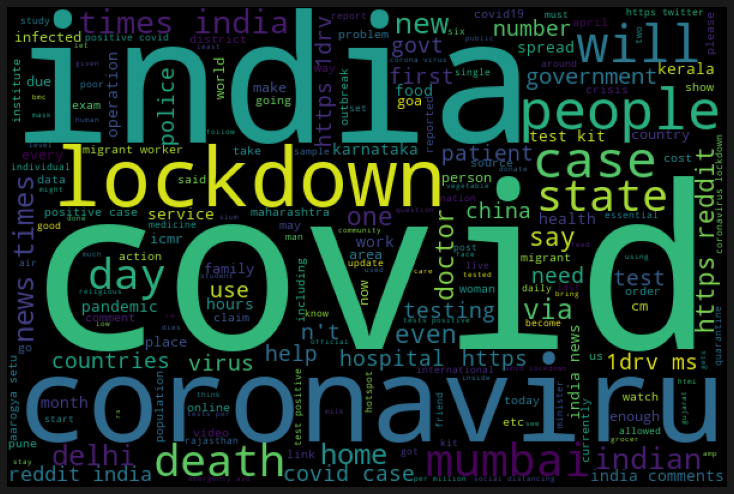

In [1131]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Coronavirus_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Non-politcal Word Cloud

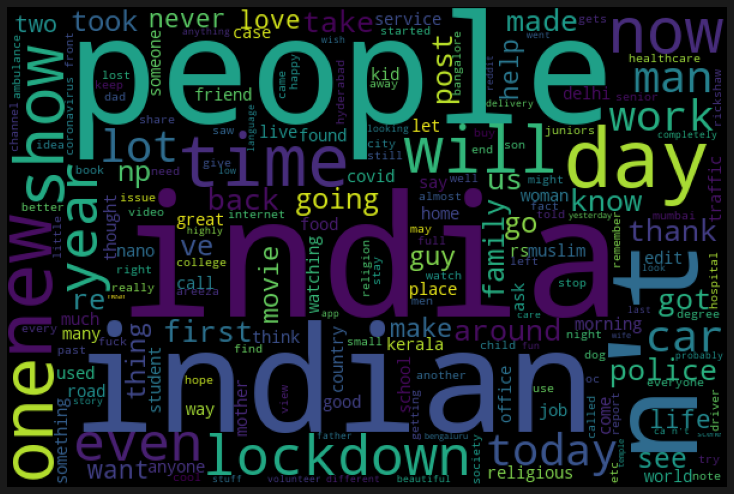

In [1132]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Non_Political_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Politics words Word Cloud

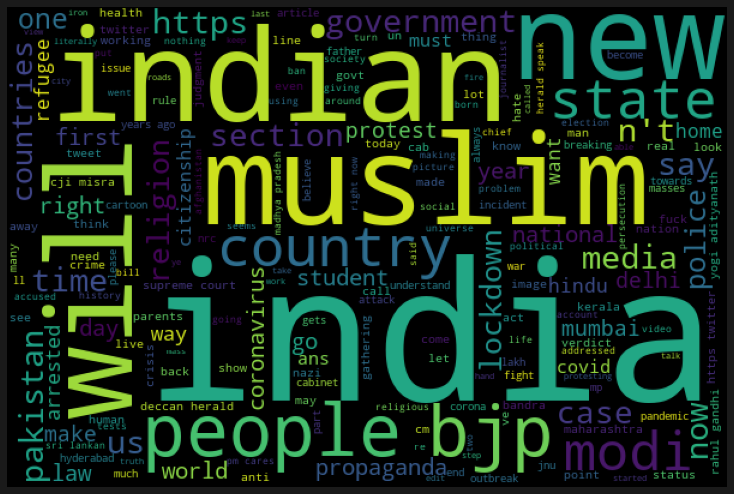

In [1133]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Politics_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Ask India words, Word Cloud

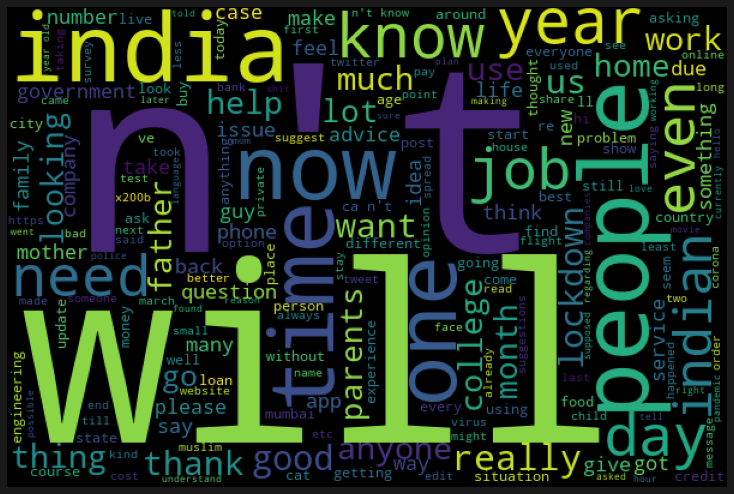

In [1134]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(AskIndia_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Comparison of length of posts and number of words used in different flare posts

In [1135]:
Coronavirus["post_length"] = Coronavirus.text.apply(lambda x: len(x))
Non_Political["post_length"] = Non_Political.text.apply(lambda x: len(x))

Coronavirus['number_words'] = Coronavirus.text.apply(lambda x: len(x.split()))
Non_Political['number_words'] = Non_Political.text.apply(lambda x: len(x.split()))

print("Mean Length of Coronavirus Posts " + str(Coronavirus["post_length"].mean()))
print("Mean Length of Non Political Posts "  + str(Non_Political["post_length"].mean()))
print("Mean word usage of Coronavirus Posts "  + str(Coronavirus['number_words'].mean()))
print("Mean word usage of Non Political Posts "  + str(Non_Political['number_words'].mean()))


Mean Length of Coronavirus Posts 211.48453608247422
Mean Length of Non Political Posts 184.6290322580645
Mean word usage of Coronavirus Posts 31.519882179675996
Mean word usage of Non Political Posts 31.698387096774194


## Building the Flare Detector

Helper Function to build confusion matrix

In [1136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Data Collection
<ul>
    <li> The required data here is extracted from data collected earlier </li>
    <li> The TOP, HOT and NEW posts are concatenated in frame </li>
    <li> duplicates are removed </li>
</ul>    

In [1137]:
top_text_flare_data = top_posts[['id','title','body','flare']]
hot_text_flare_data = hot_posts[['id','title','body','flare']]
new_text_flare_data = new_posts[['id','title','body','flare']]

frames = [top_text_flare_data, hot_text_flare_data, new_text_flare_data]
data = pd.concat(frames)
data.drop_duplicates(keep='last',inplace=True)
data.describe()

,id,title,body,flare
count,1830,1830,1830,1825
unique,1830,1820,317,40
top,a9qr7h,Late Night Random Discussion Thread !,,Non-Political
freq,1,4,1508,534


# Part I
Here around 15 flares are considered

### Since the number of flare was large (40), all the flares with less than 3 posts are deleted here.
<ul>
<li>This is done since having large number of flares reduced the accuracy if test dataset on splitting only had the lower ones.</li>
<li>Also model is able to predict only the most prominent ones due to less data. </li>
<li>Creating a text column which concatenates the title and body text </li>
<li> ALL the rows with NONE data are removed </li>
</ul>

In [1138]:
data = data.groupby('flare').filter(lambda x : len(x)>3)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.mask(data.eq('None')).dropna()
data.describe()

,id,title,body,flare,text
count,1794,1794,1794,1794,1794
unique,1794,1784,309,15,1786
top,a9qr7h,Late Night Random Discussion Thread !,,Non-Political,Late Night Random Discussion Thread ! ^Beep ^B...
freq,1,4,1480,534,3


#### Preprocessing the data
<ul>
    <li>Creating regex emoji pattern to remove emojis</li>
    <li> All strings are lowered </li>
    <li> Punctuation, whitespaces,links are removed</li>
    <li> Stop words are removed and words are stemmed</li>
    <li> Finally it contains list of strings where each word is stemmed and cleaned</li>
</ul>

In [1139]:
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

data['text'] = (data['text'].str.lower() #lowercase
                           .str.replace(r'[^\w\s]+', '') #rem punctuation 
                           .str.replace(emoji_pattern, '') #rem emoji
                           .str.replace(r'http\S+','') #rem links
                           .str.strip() #rem trailing whitespaces
                           .str.split()) #split by whitespaces

res = []
stop_words = set(stopwords.words('english')) 

for i in data['text']:
    t = ""
    for j in i:
        if j not in stop_words:
            w = ps.stem(j)
            t += w
            t += " "
    res.append(t)
data['text'] = res

Split the dataset into training and validation datasets 


In [1140]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

train_x, test_x, train_y, test_y = model_selection.train_test_split(data['text'], data['flare'],test_size=0.3)

# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

encoder = preprocessing.LabelEncoder()

# label encode the target variable 
Y = encoder.fit_transform(Y)
train_y = encoder.transform(train_y)
test_y = encoder.transform(test_y)


Converting the words to vectors using Tfidf to be used for ML algos

In [1141]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['text'])
Train_X_Tfidf = Tfidf_vect.transform(train_x)
Test_X_Tfidf = Tfidf_vect.transform(test_x)
X = Tfidf_vect.transform(X)

In [1142]:
np.random.seed(500)

### Calculating Accuracy of different ML algo

#### Naive Bayes

In [1143]:
from sklearn import naive_bayes
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
accuracy_naive = accuracy_score(predictions_NB, test_y)*100

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

Naive Bayes Accuracy Score ->  47.680890538033395


#### SVM

In [1144]:
from sklearn import svm
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
accuracy_SVM = accuracy_score(predictions_SVM, test_y)*100
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)

SVM Accuracy Score ->  56.77179962894249


#### Random Forest Classifier

In [1145]:
from sklearn import ensemble
random_forest_classfier = ensemble.RandomForestClassifier()
random_forest_classfier.fit(Train_X_Tfidf,train_y)
predictions_RF = random_forest_classfier.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
accuracy_rfc = accuracy_score(predictions_RF, test_y)*100
print("RF Accuracy Score -> ",accuracy_score(predictions_RF, test_y)*100)

RF Accuracy Score ->  53.80333951762524


#### SGDClassifier 
linear classifier optimized by the SGD.

In [1146]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_sgd = sgd.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
accuracy_sgd = accuracy_score(predictions_sgd, test_y)*100
print("SGD Accuracy Score -> ",accuracy_score(predictions_sgd, test_y)*100)

SGD Accuracy Score ->  56.400742115027825


#### LogisticRegression

In [1147]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(n_jobs=1, C=1e5,max_iter=2000)
Logistic_Regression.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_Logistic_Regression = Logistic_Regression.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
accuracy_lr = accuracy_score(predictions_Logistic_Regression, test_y)*100
print("Logistic_Regression Accuracy Score -> ",accuracy_score(predictions_Logistic_Regression, test_y)*100)

Logistic_Regression Accuracy Score ->  50.46382189239333


### Accuracy Comparison

In [1148]:
model_prediction = [accuracy_naive,accuracy_SVM,accuracy_rfc,accuracy_sgd,accuracy_lr]
model_names = ["Naive","SVM","random_forest_classfier","sgd","Logistic_Regression"]
for i in range(0,len(models)):
    print("Accuracy by " + model_names[i] + " = " + str(model_prediction[i]) + "%")

Accuracy by Naive = 47.680890538033395%
Accuracy by SVM = 56.77179962894249%
Accuracy by random_forest_classfier = 53.80333951762524%
Accuracy by sgd = 56.400742115027825%
Accuracy by Logistic_Regression = 50.46382189239333%


In [1149]:
""""
kfold = model_selection.KFold(n_splits=10)
model = ensemble.RandomForestClassifier()
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
"""""

'"\nkfold = model_selection.KFold(n_splits=10)\nmodel = ensemble.RandomForestClassifier()\nresults = model_selection.cross_val_score(model, X, Y, cv=kfold)\nprint("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))\n'

#### Testing on Manual Examples
below example list is created on which the models will predict the flare

In [1150]:
example_list = np.array(["Stuck in quarantine. Playing games all day","This. virus is killing me","Government of India needs to take action ","All the political ministers need to work for india"])
Example = pd.Series(example_list)
Example = (Example.str.lower() #lowercase
                           .str.replace(r'[^\w\s]+', '') #rem punctuation 
                           .str.replace(emoji_pattern, '') #rem emoji
                           .str.replace(r'http\S+','') #rem links
                           .str.strip() #rem trailing whitespaces
                           .str.split()) #split by whitespaces
res = []
stop_words = set(stopwords.words('english')) 

for i in Example:
    t = ""
    for j in i:
        if j not in stop_words:
            w = ps.stem(j)
            t += w
            t += " "
    res.append(t)
Example = res
Example_Tfidf = Tfidf_vect.transform(Example)

In [1151]:
models = [Naive,SVM,random_forest_classfier,sgd,Logistic_Regression]
for i in range(0,len(models)):
    model = models[i]
    predict_example = model.predict(Example_Tfidf)
    print("Predictions by " + model_names[i])
    print(encoder.inverse_transform(predict_example))


Predictions by Naive
['Non-Political' 'Coronavirus' 'Coronavirus' 'Coronavirus']
Predictions by SVM
['Non-Political' 'Non-Political' 'Coronavirus' 'Politics']
Predictions by random_forest_classfier
['Non-Political' 'Non-Political' 'Politics' 'Politics']
Predictions by sgd
['Non-Political' 'Non-Political' 'Politics' 'Politics']
Predictions by Logistic_Regression
['Coronavirus' 'Non-Political' 'Politics' 'Politics']


#### Building a confusion matrix to analyze the results from the best classifier yet (sgd) 

Normalized confusion matrix


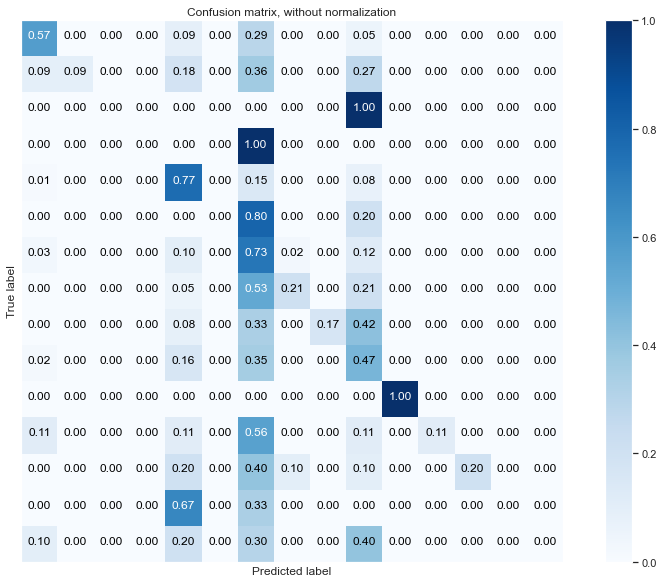

In [1152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions_sgd)

plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

# Part II
Since most of the cm is 0 or very less values here the dataset is reduced

#### Helper function to get accuracy from all the ML models which were defined as above

In [1153]:
def get_accuracy(Train_X_Tfidf,train_y,Test_X_Tfidf,test_y):
    from sklearn import naive_bayes
    # fit the training dataset on the NB classifier
    Naive = naive_bayes.MultinomialNB()
    Naive.fit(Train_X_Tfidf,train_y)
    # predict the labels on validation dataset
    predictions_NB = Naive.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    accuracy_naive = accuracy_score(predictions_NB, test_y)*100
    print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

    from sklearn import svm
    # fit the training dataset on the classifier
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(Train_X_Tfidf,train_y)
    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    accuracy_SVM = accuracy_score(predictions_SVM, test_y)*100
    print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)

    from sklearn import ensemble
    random_forest_classfier = ensemble.RandomForestClassifier()
    random_forest_classfier.fit(Train_X_Tfidf,train_y)
    predictions_RF = random_forest_classfier.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    accuracy_rfc = accuracy_score(predictions_RF, test_y)*100
    print("RF Accuracy Score -> ",accuracy_score(predictions_RF, test_y)*100)

    from sklearn.linear_model import LogisticRegression
    Logistic_Regression = LogisticRegression(n_jobs=1, C=1e5,max_iter=2000)
    Logistic_Regression.fit(Train_X_Tfidf,train_y)
    # predict the labels on validation dataset
    predictions_Logistic_Regression = Logistic_Regression.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    accuracy_lr = accuracy_score(predictions_Logistic_Regression, test_y)*100
    print("Logistic_Regression Accuracy Score -> ",accuracy_score(predictions_Logistic_Regression, test_y)*100)

    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    sgd.fit(Train_X_Tfidf,train_y)
    # predict the labels on validation dataset
    predictions_sgd = sgd.predict(Test_X_Tfidf)
    # Use accuracy_score function to get the accuracy
    accuracy_sgd = accuracy_score(predictions_sgd, test_y)*100
    print("SGD Accuracy Score -> ",accuracy_score(predictions_sgd, test_y)*100)

### Data is made again by using the scraped data, but here only flares with greater than 100 posts are used
<ul>
    <li>Data is cleaned and prepared</li>
</ul>    

In [1154]:
top_text_flare_data = top_posts[['id','title','body','flare']]
hot_text_flare_data = hot_posts[['id','title','body','flare']]
new_text_flare_data = new_posts[['id','title','body','flare']]

frames = [top_text_flare_data, hot_text_flare_data, new_text_flare_data]
data = pd.concat(frames)
data.drop_duplicates(keep='last',inplace=True)
data = data.groupby('flare').filter(lambda x : len(x)>100)

data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.mask(data.eq('None')).dropna()

emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

data['text'] = (data['text'].str.lower() #lowercase
                           .str.replace(r'[^\w\s]+', '') #rem punctuation 
                           .str.replace(emoji_pattern, '') #rem emoji
                           .str.replace(r'http\S+','') #rem links
                           .str.strip() #rem trailing whitespaces
                           .str.split()) #split by whitespaces

res = []
stop_words = set(stopwords.words('english')) 

for i in data['text']:
    t = ""
    for j in i:
        if j not in stop_words:
            w = ps.stem(j)
            t += w
            t += " "
    res.append(t)
data['text'] = res

#### Data obtained above is divided into train,test and vectorized /encoded

In [1155]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

train_x, test_x, train_y, test_y = model_selection.train_test_split(data['text'], data['flare'],test_size=0.3)

# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

encoder = preprocessing.LabelEncoder()

# label encode the target variable 
Y = encoder.fit_transform(Y)
train_y = encoder.transform(train_y)
test_y = encoder.transform(test_y)
Tfidf_vect = TfidfVectorizer(max_features=15000)
Tfidf_vect.fit(data['text'])
Train_X_Tfidf = Tfidf_vect.transform(train_x)
Test_X_Tfidf = Tfidf_vect.transform(test_x)
X = Tfidf_vect.transform(X)

#### Accuracy is measured from this data

In [1156]:
get_accuracy(Train_X_Tfidf,train_y,Test_X_Tfidf,test_y)

Naive Bayes Accuracy Score ->  61.94690265486725
SVM Accuracy Score ->  63.716814159292035
RF Accuracy Score ->  62.61061946902655
Logistic_Regression Accuracy Score ->  63.05309734513275
SGD Accuracy Score ->  64.82300884955751


#### Data is oversampled

In [1157]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_oversampled, Y_oversampled = smote.fit_resample(X, Y)
Train_X_Tfidf_oversampled, Test_X_Tfidf_oversampled, train_y_oversampled, test_y_oversampled = model_selection.train_test_split(X_oversampled, Y_oversampled,test_size=0.3)

#### Accuracy is measured from the oversampled data

In [1158]:
get_accuracy(Train_X_Tfidf_oversampled,train_y_oversampled,Test_X_Tfidf_oversampled,test_y_oversampled)

Naive Bayes Accuracy Score ->  61.31907308377896
SVM Accuracy Score ->  74.8663101604278
RF Accuracy Score ->  69.87522281639929
Logistic_Regression Accuracy Score ->  68.44919786096256
SGD Accuracy Score ->  73.0837789661319


Normalized confusion matrix


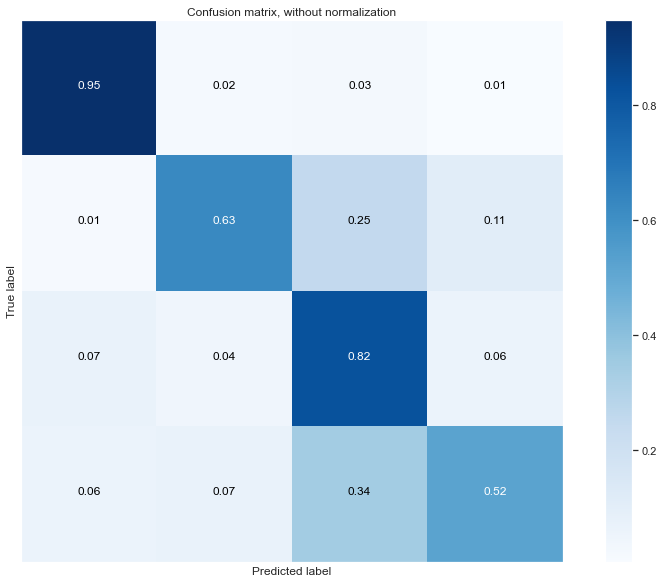

In [1159]:
from sklearn.metrics import confusion_matrix

model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model.fit(Train_X_Tfidf_oversampled,train_y_oversampled)
predictions_sgd = model.predict(Test_X_Tfidf_oversampled)
cm = confusion_matrix(test_y_oversampled, predictions_sgd)
plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

### The confusion matrix indicates better values than previous one

#### Below code will download the model, tfidf vectorizer and encoder to be directly used in Web App

In [1160]:
import pickle
pickle.dump(model, open("model.pkl","wb"))
pickle.dump(Tfidf_vect, open("tfidf.pickle", "wb"))
np.save('classes.npy', encoder.classes_)

#### This is used to test the endpoint by sending request from test.txt

In [1161]:
import requests

with open('test.txt', 'rb') as f:
    r = requests.post('http://127.0.0.1:5000/automated_testing', files={'test.txt': f})
    a = r.json()
    print(a)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /automated_testing (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x11a067410>: Failed to establish a new connection: [Errno 61] Connection refused'))